# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [96]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [32]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

### Made up small practice list
#fake_cities = ["orlando", "staplesstaples", "bremerton", "portland", "eeugene", "chicago", "amsterdam"]

###  Setting seed for trouble shooting.  Delete when complete.
#np.random.seed(204)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

637

In [84]:
city_dict = {
    "city": [],
    "cloudiness": [],
    "country": [],
    "date": [],
    "humidity": [],
    "lat": [],
    "lng": [],
    "max_temp": [],
    "wind_speed": []}

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it's being processed (with the city number and city name).


In [85]:
print(f"Beginning Data Retrieval")
print("-----------------------------")


## Edit this to change list
city_list = cities

countof_list = len(city_list)

for index, city in enumerate(city_list):
    
    url = "http://api.openweathermap.org/data/2.5/weather?q=" + city + "&appid=" + weather_api_key + ""
    request = requests.get(url).json()
    
    if request["cod"] == "404":
        print(f"City not found: {city},  Skipping...")
        continue
    
    
    print(f"Processing record {index + 1} of {countof_list} | {city}")
    
    city_dict["city"].append(request["name"]) 
    city_dict["cloudiness"].append(request["clouds"]["all"])
    city_dict["country"].append(request["sys"]["country"])
    city_dict["date"].append(request["dt"])
    city_dict["humidity"].append(request["main"]["humidity"])
    city_dict["lat"].append(request["coord"]["lat"])
    city_dict["lng"].append(request["coord"]["lon"])
    city_dict["max_temp"].append(request["main"]["temp_max"])
    city_dict["wind_speed"].append(request["wind"]["speed"])
 
    
    time.sleep(1)
#print(city_dict)

Beginning Data Retrieval
-----------------------------
Processing record 1 of 637 | barrow
Processing record 2 of 637 | vaini
Processing record 3 of 637 | katsuura
Processing record 4 of 637 | yellowknife
Processing record 5 of 637 | khatanga
Processing record 6 of 637 | horodkivka
Processing record 7 of 637 | jamestown
Processing record 8 of 637 | kodinar
Processing record 9 of 637 | busselton
Processing record 10 of 637 | faanui
Processing record 11 of 637 | east london
Processing record 12 of 637 | castro
Processing record 13 of 637 | aksarka
Processing record 14 of 637 | san juan
Processing record 15 of 637 | mar del plata
Processing record 16 of 637 | ushuaia
Processing record 17 of 637 | celestun
Processing record 18 of 637 | nicoya
Processing record 19 of 637 | mezen
Processing record 20 of 637 | sangueya
Processing record 21 of 637 | flinders
Processing record 22 of 637 | cockburn town
Processing record 23 of 637 | chokurdakh
City not found: taolanaro,  Skipping...
Processing r

Processing record 206 of 637 | dikson
Processing record 207 of 637 | mayo
Processing record 208 of 637 | kirakira
Processing record 209 of 637 | north bend
Processing record 210 of 637 | wynyard
Processing record 211 of 637 | saint-andre-les-vergers
Processing record 212 of 637 | burnie
Processing record 213 of 637 | sitka
Processing record 214 of 637 | teknaf
Processing record 215 of 637 | leh
Processing record 216 of 637 | guerrero negro
Processing record 217 of 637 | pueblo nuevo
Processing record 218 of 637 | charters towers
Processing record 219 of 637 | olafsvik
Processing record 220 of 637 | xining
Processing record 221 of 637 | abu kamal
Processing record 222 of 637 | te anau
Processing record 223 of 637 | kulhudhuffushi
Processing record 224 of 637 | nome
Processing record 225 of 637 | road town
Processing record 226 of 637 | namatanai
Processing record 227 of 637 | kot samaba
Processing record 228 of 637 | malaya serdoba
Processing record 229 of 637 | kodiak
Processing record

City not found: jabiru,  Skipping...
Processing record 410 of 637 | sao felix do xingu
Processing record 411 of 637 | verkhnevilyuysk
Processing record 412 of 637 | hagere selam
Processing record 413 of 637 | longyearbyen
Processing record 414 of 637 | woodstock
Processing record 415 of 637 | carahue
Processing record 416 of 637 | lambarene
Processing record 417 of 637 | marawi
Processing record 418 of 637 | fukue
Processing record 419 of 637 | vikarabad
Processing record 420 of 637 | clyde river
Processing record 421 of 637 | stephenville
Processing record 422 of 637 | karratha
City not found: halalo,  Skipping...
Processing record 424 of 637 | linxia
Processing record 425 of 637 | fort nelson
Processing record 426 of 637 | cururupu
Processing record 427 of 637 | dicabisagan
Processing record 428 of 637 | belmonte
Processing record 429 of 637 | rabo de peixe
Processing record 430 of 637 | belaya gora
Processing record 431 of 637 | payo
Processing record 432 of 637 | urbano santos
Proc

Processing record 612 of 637 | ajdabiya
City not found: cheuskiny,  Skipping...
Processing record 614 of 637 | kathu
Processing record 615 of 637 | bereda
Processing record 616 of 637 | mount pleasant
Processing record 617 of 637 | pryazha
Processing record 618 of 637 | haines junction
Processing record 619 of 637 | redmond
Processing record 620 of 637 | noumea
Processing record 621 of 637 | atikokan
Processing record 622 of 637 | carutapera
Processing record 623 of 637 | vavoua
Processing record 624 of 637 | port hawkesbury
Processing record 625 of 637 | san carlos de bariloche
Processing record 626 of 637 | asau
Processing record 627 of 637 | mwinilunga
Processing record 628 of 637 | tailai
Processing record 629 of 637 | pedasi
Processing record 630 of 637 | matara
Processing record 631 of 637 | manzanillo
City not found: ust-bolsheretsk,  Skipping...
Processing record 633 of 637 | mega
Processing record 634 of 637 | evensk
Processing record 635 of 637 | nhulunbuy
Processing record 6

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [261]:
data_raw = pd.DataFrame(city_dict)
data_raw.to_csv("output_data/cities.csv", index=True, index_label="city_id")
data_raw = data_raw.rename(columns={
    "city": "City",
    "cloudiness": "Cloudiness",
    "country": "Country",
    "date": "Date",
    "humidity": "Humidity",
    "lat": "Latitude",
    "lng": "Longitude",
    "max_temp": "Max Temp",
    "wind_speed": "Wind Speed"
})
data_raw.head()

,City,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Max Temp,Wind Speed
0,Barrow,1,US,1619034860,79,71.2906,-156.7887,266.15,3.09
1,Vaini,40,TO,1619035040,94,-21.2000,-175.2000,296.15,1.54
2,Katsuura,20,JP,1619035041,41,35.1333,140.3000,288.15,3.60
3,Yellowknife,90,CA,1619034925,68,62.4560,-114.3525,268.15,9.26
4,Khatanga,100,RU,1619035044,94,71.9667,102.5000,260.66,6.95


In [262]:
data_raw.describe()

,Cloudiness,Date,Humidity,Latitude,Longitude,Max Temp,Wind Speed
count,582.000000,5.820000e+02,582.000000,582.000000,582.000000,582.000000,582.000000
mean,56.226804,1.619035e+09,68.713058,20.391711,18.292838,288.975825,3.739089
std,38.433304,2.530563e+02,23.048519,32.866398,90.727667,11.609709,2.513365
min,0.000000,1.619035e+09,6.000000,-54.800000,-179.166700,248.870000,0.220000
25%,20.000000,1.619035e+09,55.250000,-6.216700,-59.471350,281.480000,1.790000
50%,70.000000,1.619035e+09,74.000000,24.915900,24.315050,291.150000,3.090000
75%,95.000000,1.619036e+09,86.000000,47.522975,97.207050,298.645000,5.140000
max,100.000000,1.619036e+09,100.000000,78.218600,179.316700,309.310000,13.380000


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

In [267]:
def Scatterplots_def(x_field, y_field):
    
    x_axis = data_raw[x_field]
    y_axis = data_raw[y_field]
    
    date = time.strftime("%x")
    
    plt.scatter(x_axis, y_axis, marker="o", facecolors="blue", edgecolors="black")
    
    if y_field.lower() == "max_temp":
        y_field = "Max Temp (F)"
        plt.ylabel(y_field)
        title_str = ("City " + x_field.capitalize() + " vs. " + y_field + " (" + date + ")")
    else:
        plt.ylabel(y_field.capitalize())
        title_str = "City " + x_field.capitalize() + " vs. " + y_field.capitalize() + " (" + date + ")"
        
    if x_field.lower() == "max_temp":
        x_field = "Max Temp (F)"
        plt.xlabel(x_field)
        title_str.replace(x_field.capitalize(), x_field)
    else:
        plt.xlabel(x_field.capitalize())
        
    plt.title(title_str)

    
    #Seting the limit of the x axis to being minus 2 of the minimum Weight, and plus 2 of the maximum Weight.
    plt.xlim(min(x_axis)-  2, max(x_axis) + 2)
    #Seting the limit of the y axis to being minus 3 of the minimum Tumor_Vol, and plus 3 of the maximum Tumor_Vol.
    plt.ylim(min(y_axis) - 3, max(y_axis) + 3)

    plt.show()

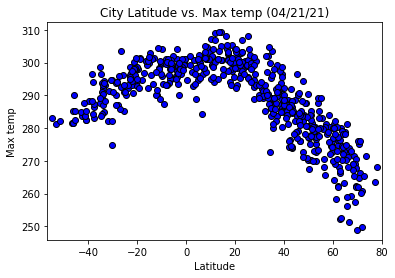

In [268]:
x_axis = "Latitude"
y_axis = "Max Temp"

Scatterplots_def(x_axis, y_axis)


## Latitude vs. Humidity Plot

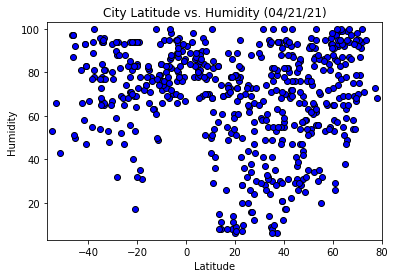

In [269]:
x_axis = "Latitude"
y_axis = "Humidity"

Scatterplots_def(x_axis, y_axis)

## Latitude vs. Cloudiness Plot

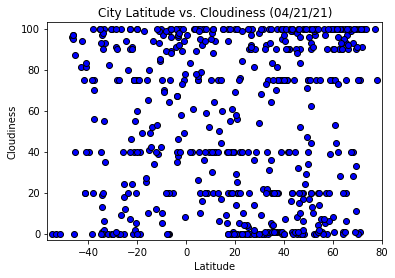

In [270]:
x_axis = "Latitude"
y_axis = "Cloudiness"

Scatterplots_def(x_axis, y_axis)

## Latitude vs. Wind Speed Plot

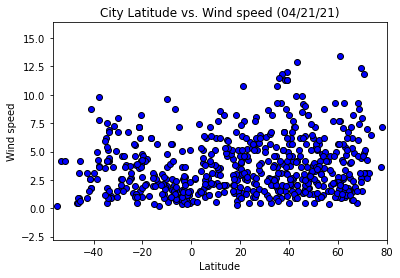

In [271]:
x_axis = "Latitude"
y_axis = "Wind Speed"

Scatterplots_def(x_axis, y_axis)

## Linear Regression

In [274]:
north_hem = data_raw.loc[(data_raw["Latitude"] > 0), :]
south_hem = data_raw.loc[(data_raw["Latitude"] < 0), :]

def Scatterplots_north_def(x_field, y_field):
    
    x_axis = north_hem[x_field]
    y_axis = north_hem[y_field]
    
    annotote_x = ((min(x_axis) + max(x_axis))/2)
    annotote_y = min(y_axis) - (max(y_axis) - min(y_axis)) / 7
    
    lim_x = min(x_axis) - ((max(x_axis) - min(x_axis)) / 10), max(x_axis) + ((max(x_axis) - min(x_axis)) / 10)
    lim_y = min(y_axis) - ((max(y_axis) - min(y_axis)) / 5), max(y_axis) + ((max(y_axis) - min(y_axis)) / 5)
    
    date = time.strftime("%x")
    
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
    regress_values = x_axis * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_axis,y_axis, marker="o", facecolors="blue", edgecolors="black")
    plt.plot(x_axis,regress_values,"g-")
    plt.annotate(line_eq,(annotote_x, annotote_y), fontsize=15, color="red")

    
    if y_field.lower() == "max_temp":
        y_field = "Max Temp (F)"
        plt.ylabel(y_field)
        title_str = ("City " + x_field.capitalize() + " vs. " + y_field + " (" + date + ")")
    else:
        plt.ylabel(y_field.capitalize())
        title_str = "City " + x_field.capitalize() + " vs. " + y_field.capitalize() + " (" + date + ")"
        
    if x_field.lower() == "max_temp":
        x_field = "Max Temp (F)"
        plt.xlabel(x_field)
        title_str.replace(x_field.capitalize(), x_field)
    else:
        plt.xlabel(x_field.capitalize())
        
    plt.title(title_str)
    
    #Seting the limit of the x axis to being minus 2 of the minimum Weight, and plus 2 of the maximum Weight.
    plt.xlim(lim_x)
    #Seting the limit of the y axis to being minus 3 of the minimum Tumor_Vol, and plus 3 of the maximum Tumor_Vol.
    plt.ylim(lim_y)

    print(f"The r-value is {rvalue}")
    
    plt.show()
    
def Scatterplots_south_def(x_field, y_field):
      
    x_axis = south_hem[x_field]
    y_axis = south_hem[y_field]
    
    annotote_x = ((min(x_axis) + max(x_axis))/2)
    annotote_y = min(y_axis) - (max(y_axis) - min(y_axis)) / 7
    
    lim_x = min(x_axis) - ((max(x_axis) - min(x_axis)) / 10), max(x_axis) + ((max(x_axis) - min(x_axis)) / 10)
    lim_y = min(y_axis) - ((max(y_axis) - min(y_axis)) / 5), max(y_axis) + ((max(y_axis) - min(y_axis)) / 5)
    
    date = time.strftime("%x")
    
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
    regress_values = x_axis * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_axis,y_axis, marker="o", facecolors="blue", edgecolors="black")
    plt.plot(x_axis,regress_values,"g-")
    plt.annotate(line_eq,(annotote_x, annotote_y), fontsize=15, color="red")

    
    if y_field.lower() == "max_temp":
        y_field = "Max Temp (F)"
        plt.ylabel(y_field)
        title_str = ("City " + x_field.capitalize() + " vs. " + y_field + " (" + date + ")")
    else:
        plt.ylabel(y_field.capitalize())
        title_str = "City " + x_field.capitalize() + " vs. " + y_field.capitalize() + " (" + date + ")"
        
    if x_field.lower() == "max_temp":
        x_field = "Max Temp (F)"
        plt.xlabel(x_field)
        title_str.replace(x_field.capitalize(), x_field)
    else:
        plt.xlabel(x_field.capitalize())
        
    plt.title(title_str)
    
    #Seting the limit of the x axis to being minus 2 of the minimum Weight, and plus 2 of the maximum Weight.
    plt.xlim(lim_x)
    #Seting the limit of the y axis to being minus 3 of the minimum Tumor_Vol, and plus 3 of the maximum Tumor_Vol.
    plt.ylim(lim_y)

    print(f"The r-value is {rvalue}")
    
    plt.show()

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is -0.8691324287694865


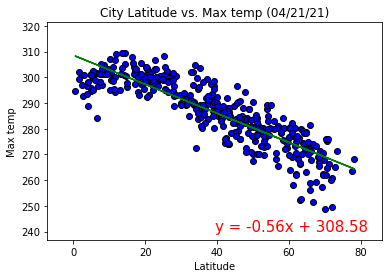

In [275]:
x_axis = "Latitude"
y_axis = "Max Temp"

Scatterplots_north_def(x_axis, y_axis)

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is 0.7361012297982475


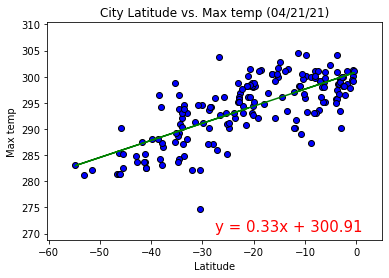

In [276]:
x_axis = "Latitude"
y_axis = "Max Temp"

Scatterplots_south_def(x_axis, y_axis)

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is 0.15997499602479007


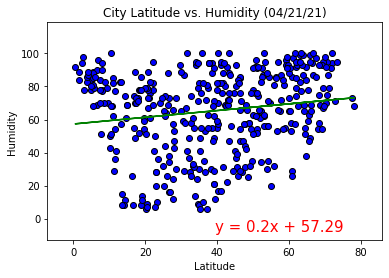

In [277]:
x_axis = "Latitude"
y_axis = "Humidity"

Scatterplots_north_def(x_axis, y_axis)

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is 0.1370673318035622


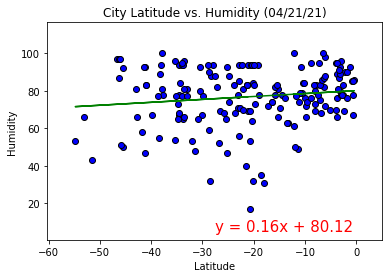

In [278]:
x_axis = "Latitude"
y_axis = "Humidity"

Scatterplots_south_def(x_axis, y_axis)

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is 0.1379882676749023


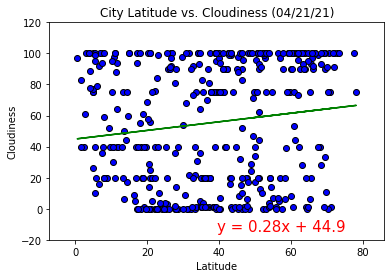

In [279]:
x_axis = "Latitude"
y_axis = "Cloudiness"

Scatterplots_north_def(x_axis, y_axis)

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is 0.1745698070421397


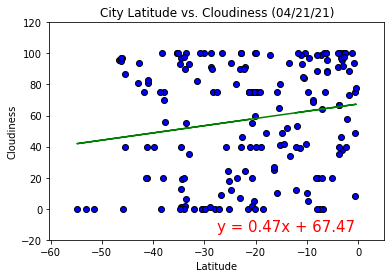

In [280]:
x_axis = "Latitude"
y_axis = "Cloudiness"

Scatterplots_south_def(x_axis, y_axis)

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is 0.08406681008034783


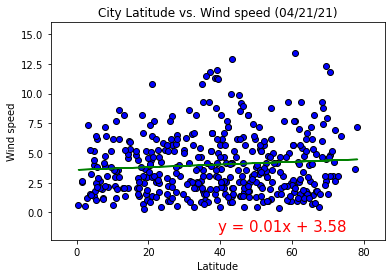

In [281]:
x_axis = "Latitude"
y_axis = "Wind Speed"

Scatterplots_north_def(x_axis, y_axis)

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is -0.1826987679898361


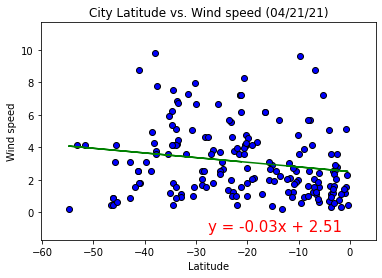

In [282]:
x_axis = "Latitude"
y_axis = "Wind Speed"

Scatterplots_south_def(x_axis, y_axis)